<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/SeoulBusanMultiVariation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,918 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import tensorflow as tf

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
file = '/gdrive/MyDrive/data/data_2020_1_12.CSV'
data = pd.read_csv(file)

In [ ]:
#data의 도착영업소코드 값을 거리값으로 치환
#data의 도착영업소코드 항을 거리로 치환

data['도착영업소코드'] = data['도착영업소코드'].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339,140:407})
data.rename(columns = {'도착영업소코드':'거리'}, inplace=True)

In [ ]:
#부산에 해당하는 값을 [거리]를 이용해 추출
data_destination = data[data['거리'].isin([407])]

#부산에 해당하는 값 중 집계시,요일,거리로 그룹화 후 통행시간 값 추출 후 평균 
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()

#data_time의 내용을 unstack 함수 이용, 재정렬
data_distance = data_time.unstack(level =-1)

In [ ]:
#data_distance의 값을 reset_index() 함수 이용 재정렬
data_out = data_distance.reset_index()

#정렬된 data_out에서 값 추출 후 리스트화
list = data_out.values.tolist()

xtrain = [ r[:2]  for r in list] #list에서 집계시와 요일 추출
ytrain = [ r[-1] for r in list] #list에서 통행시간 추출
list

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275],
 [0.0, 5.0, 15321.372549019608],
 [0.0, 6.0, 14232.461538461539],
 [1.0, 0.0, 15200.729166666666],
 [1.0, 1.0, 15656.083333333334],
 [1.0, 2.0, 15088.617021276596],
 [1.0, 3.0, 15112.045454545454],
 [1.0, 4.0, 15188.155555555555],
 [1.0, 5.0, 15066.396551724138],
 [1.0, 6.0, 14635.577777777778],
 [2.0, 0.0, 15057.040816326531],
 [2.0, 1.0, 15581.347826086956],
 [2.0, 2.0, 15345.9375],
 [2.0, 3.0, 15154.69642857143],
 [2.0, 4.0, 15332.020408163266],
 [2.0, 5.0, 14927.155172413793],
 [2.0, 6.0, 14741.063829787234],
 [3.0, 0.0, 14961.714285714286],
 [3.0, 1.0, 15481.681818181818],
 [3.0, 2.0, 15498.951219512195],
 [3.0, 3.0, 15236.627450980392],
 [3.0, 4.0, 15840.645833333334],
 [3.0, 5.0, 14882.37037037037],
 [3.0, 6.0, 14619.555555555555],
 [4.0, 0.0, 14876.06],
 [4.0, 1.0, 15488.733333333334],
 [4.0, 2.0, 16075.622222222222],
 [4.0, 3.0, 15092

show graph

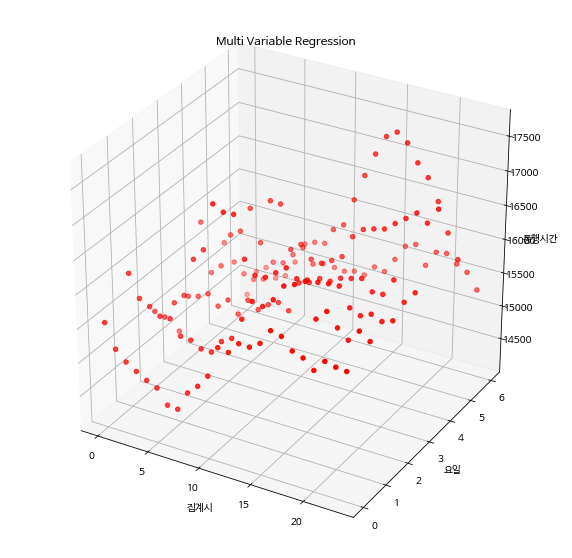

In [ ]:
x1 = [r[0] for r in list] #집계시
x2 = [r[1] for r in list] #요일
y = [r[-1] for r in list] #거리

fig = plt.figure(figsize=(10,10))   
ax = plt.axes(projection = '3d')
ax.set_title('Multi Variable Regression')
ax.set_xlabel('집계시')
ax.set_ylabel('요일')
ax.set_zlabel('통행시간')
plot = ax.scatter3D(x1,x2,y, c='r')  #scatter3d 함수 이용 3차원 그래프 도시
plt.show()

#Multi Variable using Tensorflow

In [ ]:
learning_rate = 1e-4  #alpha
iteration = 50      #iteration

#SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate)

#loss function = Mean Square Error
mse = tf.keras.losses.mean_squared_error

#modeling
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim =1))
model.compile(loss=mse, optimizer=sgd)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#trainning
history = model.fit(xtrain, ytrain, epochs=iteration)

Epoch 1/5000


ValueError: ignored

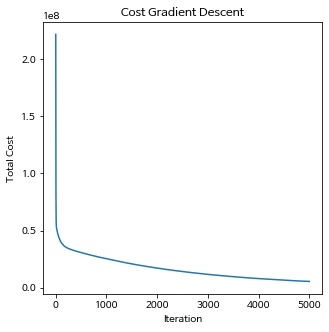

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'])
plt.title('Cost Gradient Descent')
plt.ylabel('Total Cost')
plt.xlabel('Iteration')
plt.show()

In [ ]:
print("%20s %20s" %('Step', 'Cost') + '\n')
for step in range(iteration):
  if step % 100 == 0:
    cost_val = history.history['loss'][step]
    print("%20i %20.5f" %(step, cost_val))

                Step                 Cost 

                   0      221536944.00000
                 100       40060444.00000
                 200       35440684.00000
                 300       33389696.00000
                 400       31977874.00000
                 500       30701500.00000
                 600       29537100.00000
                 700       28404918.00000
                 800       27336552.00000
                 900       26298316.00000
                1000       25266538.00000
                1100       24309722.00000
                1200       23406174.00000
                1300       22509120.00000
                1400       21630110.00000
                1500       20810998.00000
                1600       20026290.00000
                1700       19273252.00000
                1800       18512886.00000
                1900       17812148.00000
                2000       17143042.00000
                2100       16480613.00000
                2200       15852

In [ ]:
Time = 14 #@param{type:"slider", min:0, max:23, step:1}
Day = 3 #@param{type:"slider", min:0, max:6, step:1}


In [ ]:
input = [Time, Day]
time = model.predict([input])
ml_time = time[0][0]
week_days = ['월','화','수','목','금','토','일']
print("%10s %10s %50s" %('집계시','요일','서울에서 부산까지 통행시간')+'\n')
print("%10s %10s %50s" %(str(Time),week_days[Day], str(ml_time)))

       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                          15585.354
